<h1 style="font-family:Georgia; font-weight:900; color:#0A3D62;">
Fundamental Financial Screening & Analytics for Indian Equities
</h1>

<img src="nifty.jpg" width="600" style="display:block; margin-left:130px;">

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
Introduction
</h2>

<p style="font-family:Georgia; font-size:16px; text-align:justify;">
<span style="color:#0A3D62;">
This project focuses on a comprehensive financial analysis of Indian equities to identify high-quality and stable companies using fundamental metrics. The goal is to systematically evaluate company performance through structured financial screening and analytics. The analysis involves examining individual metrics, exploring relationships between metrics, and developing multi-metric frameworks for ranking and segmenting companies.
</span>
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
Aim
</h2>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
To analyze the financial performance of Indian companies and identify high-quality and stable stocks using key financial metrics.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
 Dataset Overview
</h2>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
The dataset contains key financial metrics of major Indian companies, including valuation, profitability, dividend yield, and quarterly performance indicators. These metrics will be used to perform univariate, bivariate, and multivariate analysis to identify high-quality and stable stocks.
</p>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
Key columns in the dataset are explained below for easy understanding:<br><br>
<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
<b>CMP:</b> Current Market Price of the stock in ₹.<br>
<b>PE:</b> Price-to-Earnings ratio, showing how expensive a stock is compared to its earnings.<br>
<b>MarketCap:</b> Total market value of the company in ₹ Crores.<br>
<b>DividendYield:</b> Percentage of the stock price returned as dividends annually.<br>
<b>NPQtr:</b> Net Profit earned in the latest quarter (₹ Crores).<br>
<b>QtrProfitVar:</b> Percentage change in quarterly profit compared to the previous quarter.<br>
<b>SalesQtr:</b> Total sales/revenue in the latest quarter (₹ Crores).<br>
<b>QtrSalesVar:</b> Percentage change in quarterly sales compared to the previous quarter.<br>
<b>ROCE:</b> Return on Capital Employed, indicating how efficiently the company uses its capital to generate profits.<br>
<b>PATAnn:</b> Annualized Profit After Tax in ₹ Crores.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
🎯Problem Statement
</h2>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
Investors often find it challenging to identify stable and high-quality companies from a large universe of stocks. With many financial metrics to compare, it becomes difficult to make clear and consistent decisions. This project aims to simplify that process by analyzing key financial indicators to understand company performance and highlight stocks that show strong fundamentals and stability.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
🧹 Data Cleaning / Preprocessing
</h2>

In [244]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [247]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'  

In [249]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [168]:

df = pd.read_csv("Stock_data.csv")
df.head()


,S.No.,Name,CMP\nRs.,P/E,MarCap\nRs.Cr.,DivYld\n%,NPQtr\nRs.Cr.,QtrProfitVar\n%,SalesQtr\nRs.Cr.,QtrSalesVar\n%,ROCE\n%,PATAnn\nRs.Cr.
0,1.0,Reliance Industr,2703.00,26.93,1828876.34,0.18,19323.00,-4.78,231535.00,-0.15,9.61,69797.17
1,2.0,TCS,4067.40,30.52,1471620.94,1.36,11955.00,5.00,64259.00,7.65,64.28,46598.19
2,3.0,HDFC Bank,1715.95,18.88,1309403.41,1.13,18627.44,6.03,83001.72,10.61,7.67,63902.06
3,4.0,Bharti Airtel,1698.30,85.16,1017241.98,0.47,4717.50,-8.78,38506.40,2.85,13.13,11911.52
4,5.0,ICICI Bank,1270.55,19.79,895371.04,0.79,12462.81,9.96,44581.65,20.15,7.60,44246.06


In [169]:
df.shape

(2650, 12)

In [170]:

df.info()
# Dataset size(rows × columns), column names, data types, Missing values, Memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S.No.            2650 non-null   float64
 1   Name             2650 non-null   object 
 2   CMP
Rs.          2641 non-null   float64
 3   P/E              2633 non-null   float64
 4   MarCap
Rs.Cr.    2650 non-null   float64
 5   DivYld
%         2621 non-null   float64
 6   NPQtr
Rs.Cr.     2633 non-null   float64
 7   QtrProfitVar
%   2562 non-null   float64
 8   SalesQtr
Rs.Cr.  2633 non-null   float64
 9   QtrSalesVar
%    2558 non-null   float64
 10  ROCE
%           2625 non-null   float64
 11  PATAnn
Rs.Cr.    2650 non-null   float64
dtypes: float64(11), object(1)
memory usage: 248.6+ KB


In [171]:

df.describe(include='all')  
# describe() by default summarizes numerical columns alone,'include all' ---> include all columns not just numerical ones.


,S.No.,Name,CMP\nRs.,P/E,MarCap\nRs.Cr.,DivYld\n%,NPQtr\nRs.Cr.,QtrProfitVar\n%,SalesQtr\nRs.Cr.,QtrSalesVar\n%,ROCE\n%,PATAnn\nRs.Cr.
count,2650.000000,2650,2641.000000,2633.000000,2.650000e+03,2621.000000,2633.000000,2562.000000,2633.000000,2558.000000,2625.000000,2650.000000
unique,NaN,1425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Reliance Industr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,671.490566,NaN,1660.198773,80.255594,3.270219e+04,0.624845,333.737436,172.746304,3234.349495,36.938120,19.150190,1203.164804
std,397.728788,NaN,4945.466513,382.068007,1.060839e+05,1.069051,1360.336875,2265.856299,14219.897252,395.843594,14.437768,5017.475903
min,1.000000,NaN,1.940000,1.960000,5.840700e+02,0.000000,-1190.660000,-1300.000000,0.000000,-100.000000,-0.340000,0.340000
25%,332.000000,NaN,274.000000,22.690000,2.238460e+03,0.000000,14.110000,-10.612500,177.320000,0.960000,10.410000,54.960000
50%,663.000000,NaN,609.800000,38.810000,5.853905e+03,0.290000,40.480000,16.750000,515.380000,11.305000,16.150000,147.530000
75%,994.000000,NaN,1472.000000,65.400000,1.931643e+04,0.790000,147.700000,52.890000,1414.960000,23.477500,24.000000,505.290000


<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
1. Rename Columns
</h3>

In [172]:
df.rename(columns={
    'S.No.' : 'SNo',
    'Name' : 'Company',
    'P/E': 'PE',
    'CMP\nRs.' : 'CMP',
    'MarCap\nRs.Cr.' : 'MarketCap',
    'DivYld\n%' : 'DividendYield',
    'NPQtr\nRs.Cr.' : 'NPQtr',
    'QtrProfitVar\n%' : 'QtrProfitVar',
    'SalesQtr\nRs.Cr.' : 'SalesQtr',
    'QtrSalesVar\n%' : 'QtrSalesVar',
    'ROCE\n%' : 'ROCE',
    'PATAnn\nRs.Cr.' : 'PATAnn'
}, inplace=True)

# inplace=True modifies existing dataframe directly, without needing to reassign

In [173]:
df.head()

,SNo,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn
0,1.0,Reliance Industr,2703.00,26.93,1828876.34,0.18,19323.00,-4.78,231535.00,-0.15,9.61,69797.17
1,2.0,TCS,4067.40,30.52,1471620.94,1.36,11955.00,5.00,64259.00,7.65,64.28,46598.19
2,3.0,HDFC Bank,1715.95,18.88,1309403.41,1.13,18627.44,6.03,83001.72,10.61,7.67,63902.06
3,4.0,Bharti Airtel,1698.30,85.16,1017241.98,0.47,4717.50,-8.78,38506.40,2.85,13.13,11911.52
4,5.0,ICICI Bank,1270.55,19.79,895371.04,0.79,12462.81,9.96,44581.65,20.15,7.60,44246.06


<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
2. Drop Unnecessary Columns
</h3>

In [174]:
df.drop(columns=['SNo'], inplace=True)

In [175]:
df.head()

,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn
0,Reliance Industr,2703.00,26.93,1828876.34,0.18,19323.00,-4.78,231535.00,-0.15,9.61,69797.17
1,TCS,4067.40,30.52,1471620.94,1.36,11955.00,5.00,64259.00,7.65,64.28,46598.19
2,HDFC Bank,1715.95,18.88,1309403.41,1.13,18627.44,6.03,83001.72,10.61,7.67,63902.06
3,Bharti Airtel,1698.30,85.16,1017241.98,0.47,4717.50,-8.78,38506.40,2.85,13.13,11911.52
4,ICICI Bank,1270.55,19.79,895371.04,0.79,12462.81,9.96,44581.65,20.15,7.60,44246.06


<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
3. Handling Missing Values
</h3>

In [176]:

# Counting missing values in each column
df.isna().sum()


Company           0
CMP               9
PE               17
MarketCap         0
DividendYield    29
NPQtr            17
QtrProfitVar     88
SalesQtr         17
QtrSalesVar      92
ROCE             25
PATAnn            0
dtype: int64

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
✅ <b>Rule of Thumb</b><br><br>
<b>Median</b> → use when data has outliers or is skewed.<br>
<b>Mean</b> → use when data is fairly uniform (no extreme values).<br>
<b>0</b> → use when missing means “none” or “no activity,” like Dividend Yield or variation columns.
</div>

In [177]:

# 1️⃣ Filling numeric columns with median
median_col = ['CMP', 'PE', 'NPQtr', 'SalesQtr', 'ROCE']
for col in median_col:
    df[col] = df[col].fillna(df[col].median())
    

In [178]:

# 2️⃣ Filling DividendYield with 0 (assuming no dividend if missing)
df['DividendYield'] = df['DividendYield'].fillna(0)


In [179]:

# 3️⃣ Filling variation columns with 0 (assuming no change if missing)
df['QtrProfitVar'] = df['QtrProfitVar'].fillna(0)
df['QtrSalesVar'] = df['QtrSalesVar'].fillna(0)


In [180]:
df.isna().sum()

Company          0
CMP              0
PE               0
MarketCap        0
DividendYield    0
NPQtr            0
QtrProfitVar     0
SalesQtr         0
QtrSalesVar      0
ROCE             0
PATAnn           0
dtype: int64

<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
4. Handle Outliers & Ensure Correct Numeric Types
</h3>

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        2650 non-null   object 
 1   CMP            2650 non-null   float64
 2   PE             2650 non-null   float64
 3   MarketCap      2650 non-null   float64
 4   DividendYield  2650 non-null   float64
 5   NPQtr          2650 non-null   float64
 6   QtrProfitVar   2650 non-null   float64
 7   SalesQtr       2650 non-null   float64
 8   QtrSalesVar    2650 non-null   float64
 9   ROCE           2650 non-null   float64
 10  PATAnn         2650 non-null   float64
dtypes: float64(10), object(1)
memory usage: 227.9+ KB


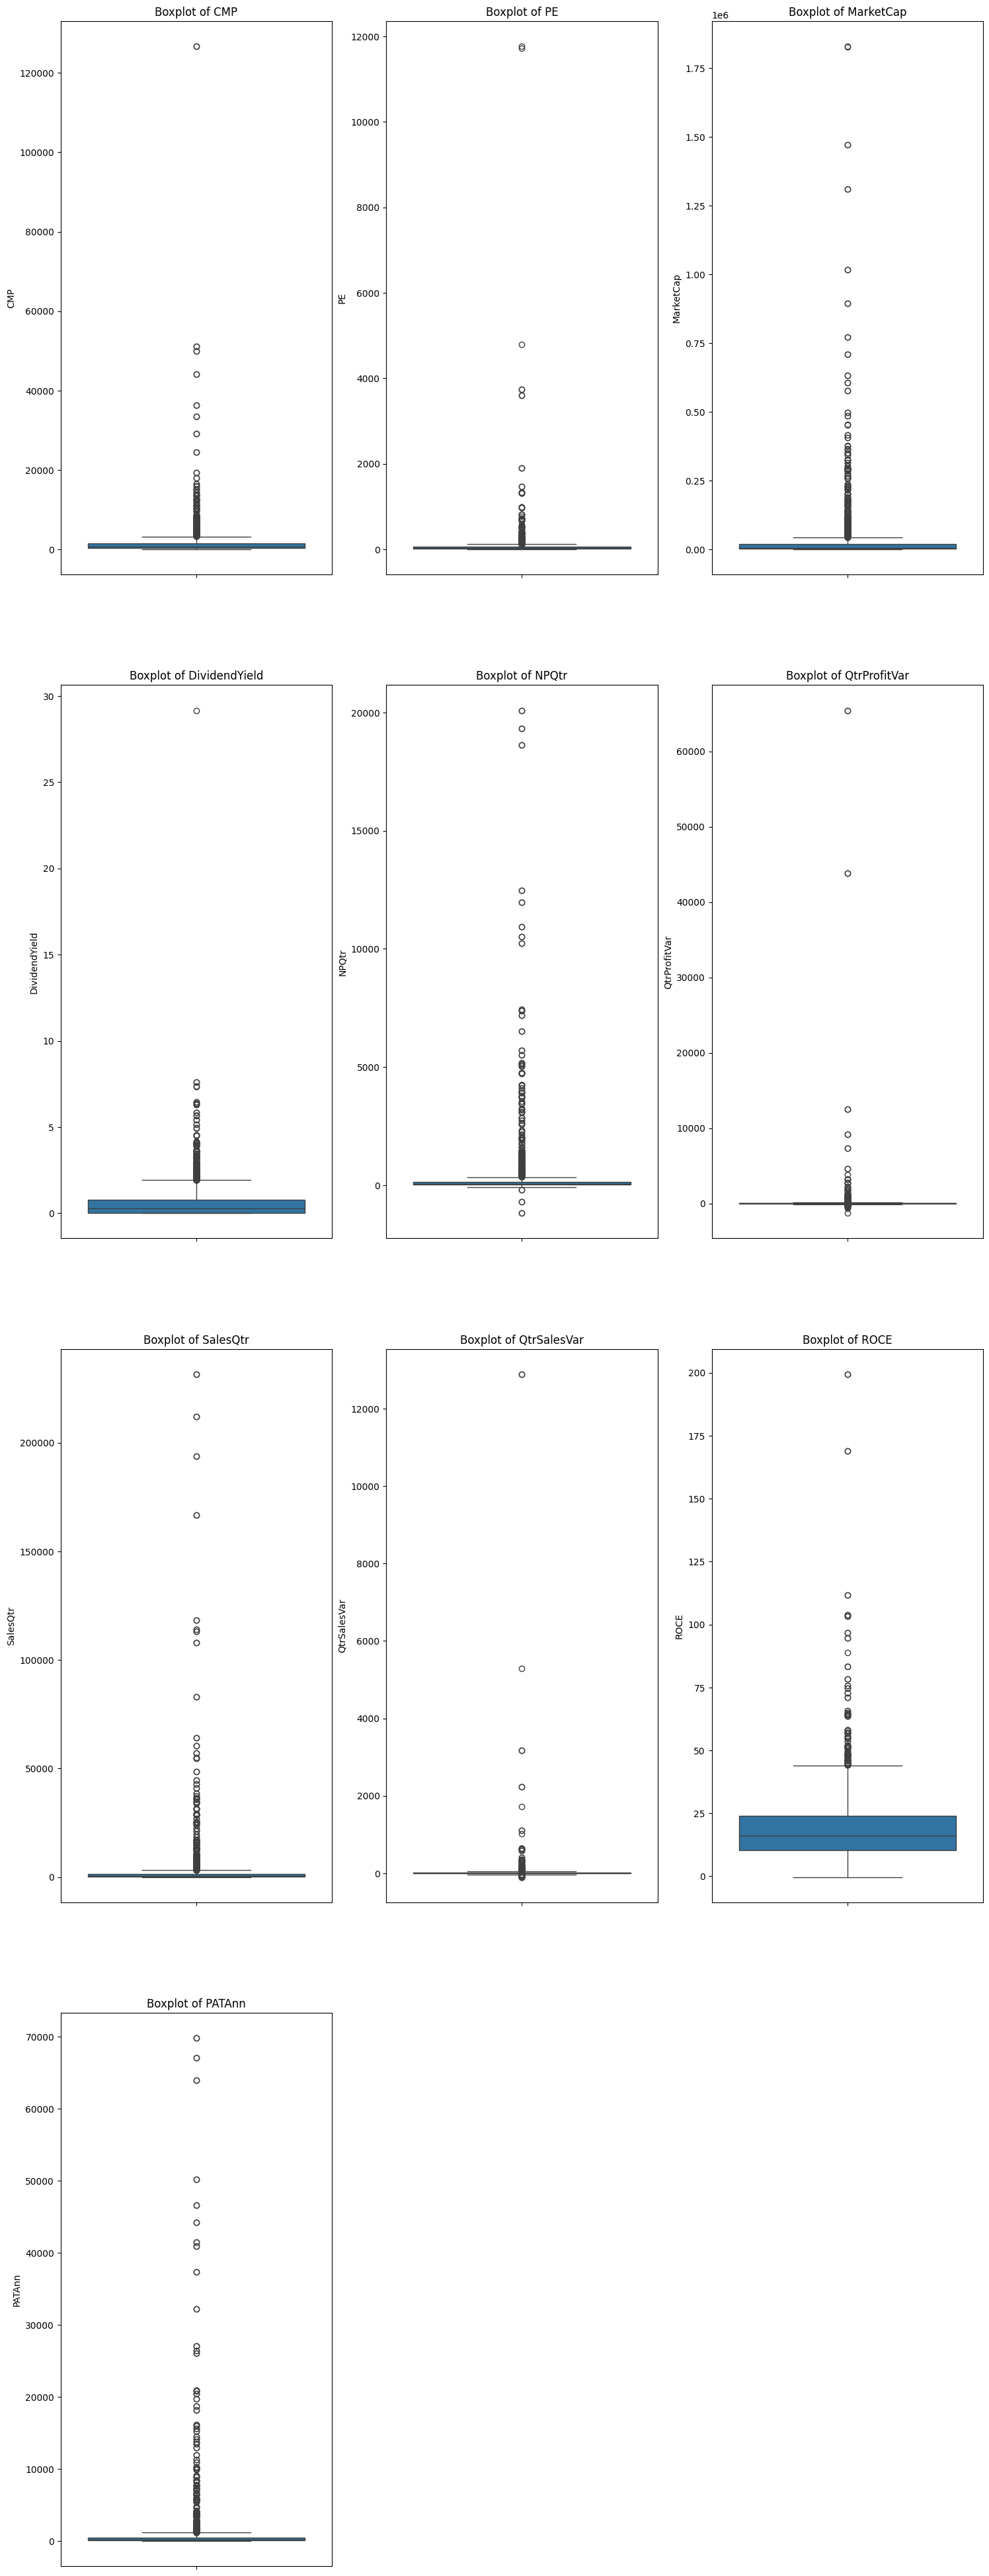

In [182]:
numeric_cols = ['CMP', 'PE', 'MarketCap', 'DividendYield', 'NPQtr', 
                'QtrProfitVar', 'SalesQtr', 'QtrSalesVar', 'ROCE', 'PATAnn']

plt.figure(figsize=(18, 50))                                
for i, col in enumerate(numeric_cols, 1):                 # enumerate gives two things at once, index number(i) starting from 1 and column names. 
    plt.subplot(4, 3, i)                                  # 4 rows and 3 column layout with position i, total 12 positions
    sns.boxplot(y=df[col])                                # Numerical values on y-axis
    plt.title(f'Boxplot of {col}' )
plt.tight_layout                                          # To not to get overlapped
plt.show()

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
• Any value below the lower limit (Q1 - 1.5 * IQR) is considered a low-end outlier.<br>
• Any value above the upper limit (Q3 + 1.5 * IQR) is considered a high-end outlier.
</p>

<img src="outlier.png" width="600" style="display:block; margin-left:130px;">

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
✅ <b>Insight</b><br><br>
• Outliers appear in every numeric metric.<br>
• Represent extreme cases — either very high or very low performers.<br>
• Outliers represent extreme or unusual performance compared to the majority of companies.<br>
• Retaining them is important for exploring true market variability.
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
5. Checking Duplicates
</h3>

In [183]:
df.duplicated().sum()

np.int64(342)

In [184]:
df[df.duplicated()].head(20)

,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn
1357,Hyundai Motor I,609.80,26.30,159258.06,0.00,1489.65,12.07,17344.23,4.34,51.25,6055.01
1359,Divi's Lab.,5855.80,92.89,155453.14,0.52,430.00,20.79,2118.00,19.12,16.48,1602.95
1372,Cipla,1506.00,27.51,121619.55,0.86,1175.46,18.05,6693.94,5.77,22.80,4206.66
1381,Dr Reddy's Labs,6692.55,20.14,111683.22,0.59,1392.40,-0.90,7696.10,13.88,26.53,5512.22
1383,Macrotech Devel.,1105.30,57.05,110003.90,0.20,475.90,166.42,2846.50,75.99,11.06,1618.24
1391,Info Edg.(India),7715.50,155.60,99980.61,0.28,258.86,56.83,676.71,8.11,3.65,532.09
1392,Apollo Hospitals,6927.40,96.15,99605.41,0.23,315.50,83.19,5085.60,15.12,15.11,875.45
1393,Zydus Lifesci.,989.00,23.89,99516.55,0.31,1482.50,29.66,6207.50,20.78,22.34,3860.03
1400,Lupin,2132.95,43.04,97293.10,0.38,805.54,77.18,5600.33,16.33,15.72,1891.97
1420,IDBI Bank,77.45,13.21,83277.40,1.89,1739.15,41.09,6669.84,-2.82,6.23,5730.87


In [185]:

# Before removing duplicates, to make sure if company name appear more than once 
df['Company'].value_counts()


Company
Reliance Industr    2
Swaraj Engines      2
Lumax Auto Tech.    2
Sanghvi Movers      2
Venus Pipes         2
                   ..
Snowman Logistic    1
Manali Petrochem    1
Orient              1
Arihant Capital     1
Triton Valves       1
Name: count, Length: 1425, dtype: int64

In [186]:
df['Company'].value_counts().head(50)

Company
Reliance Industr    2
Swaraj Engines      2
Lumax Auto Tech.    2
Sanghvi Movers      2
Venus Pipes         2
Sula Vineyards      2
JNK                 2
CARE Ratings        2
Kalyani Invest.     2
IRB InvIT Fund      2
Veedol Corporat     2
Polyplex Corpn      2
Hi-Tech Pipes       2
Avalon Tech         2
Kingfa Science      2
MPS                 2
Sunflag Iron        2
Indostar Capital    2
Savita Oil Tech     2
BF Utilities        2
DCB Bank            2
Indian Metals       2
RPSG Ventures       2
Hathway Cable       2
Intellig Sup Tru    2
Datamatics Glob.    2
KDDL Ltd            2
SEAMEC Ltd          2
Kalyani Steels      2
Prec. Wires (I)     2
Sindhu Trade        2
Quick Heal Tech     2
Hinduja Global      2
Bhansali Engg.      2
Geojit Fin. Ser.    2
Muthoot Microfin    2
Fischer Medical     2
Arvind SmartSp.     2
Exicom Tele-Sys.    2
Indrapr.Medical     2
Kewal Kir.Cloth.    2
Jain Irrigation     2
Epack Durable       2
Northern ARC        2
India Glycols       2
In

In [187]:

#To check if the 2 rows per company are identical or with different updates
df[df['Company'] == 'Reliance Industr']


,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn
0,Reliance Industr,2703.0,26.93,1828876.34,0.18,19323.0,-4.78,231535.0,-0.15,9.61,69797.17
1300,Reliance Industr,2700.0,26.90,1826846.51,0.18,19323.0,-4.78,231535.0,-0.15,9.61,69797.17


<p style="font-family:Georgia; font-size:18px; color:#0A3D62; text-align:justify;">
🟦 These are entries from two different point of time, not two different quarters.
</p>

In [188]:

# Similarly checking for Swaraj Engines  
df[df['Company'] == 'Swaraj Engines']


,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn
814,Swaraj Engines,2950.40,24.24,3583.94,3.21,45.42,20.57,464.24,19.37,51.64,137.1
2114,Swaraj Engines,2942.85,24.18,3574.77,3.22,45.42,20.57,464.24,19.37,51.64,137.1


<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
✔️ <b>Both rows have:</b><br>
• Same quarterly performance values (NPQtr, QtrProfitVar, SalesQtr, QtrSalesVar, PATAnn, ROCE).<br><br>
<b>Slight differences only in:</b><br>
• CMP (share price)<br>
• PE (because PE depends on price)<br>
• MarketCap (depends on price)<br>
• DividendYield (depends on price)<br><br>
👉 <b>This means:</b><br>
Both entries represent the same quarter’s fundamental data, but recorded at two different market prices.
</p>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
⚠️ <b>For my analysis (screening, univariate, bivariate analysis), I should keep only one entry because:</b><br><br>
• Duplicate fundamentals will distort metrics.<br>
• Market cap and price should not appear twice.<br>
• It will wrongly count the company twice in histograms, distributions, and correlations.<br>
• Slight price differences <b>do not</b>  represent <b>different observations.<b>
</p>

In [189]:

# Keep only the first occurrence of each company
df = df.drop_duplicates(subset='Company', keep='first')
# drop_duplicates() alone won't work here, since it removes only perfectly identical rows, and my rows are not perfectly identical.


In [190]:
df.duplicated(subset='Company').sum()

np.int64(0)

In [191]:
df['Company'].value_counts().head(20)

Company
Reliance Industr    1
Platinum Industr    1
Indo Tech.Trans.    1
Sai Silks           1
Kesar India         1
RIR Power Electr    1
Confidence Petro    1
M M Forgings        1
Baazar Style        1
Spectrum Electr.    1
SMS Pharma.         1
HLE Glascoat        1
Rashi Peripheral    1
Venky's (India)     1
Goodyear India      1
Pondy Oxides        1
XPRO India          1
Interarch Build.    1
Landmark Cars       1
Prataap Snacks      1
Name: count, dtype: int64

In [192]:
df.shape

(1425, 11)

<h2 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
📊 Data Visualization
</h2>

<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
🔍 Univariate Analysis
</h3>

<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
1. Problem – Univariate Analysis of P/E Ratios
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
<b>Understanding the Distribution of P/E Ratios Among Indian Companies:</b><br>
This analysis explores the overall spread of Price-to-Earnings (P/E) ratios across Indian 
companies. It focuses on identifying the typical valuation range, spotting unusually high or 
low extremes, and determining the threshold beyond which a stock may be considered expensive.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>


In [193]:

# 1. How many missing P/E values?
df['PE'].isna().sum()


np.int64(0)

In [194]:

# 2. Basic numbers: count, mean, median, min, max
df['PE'].describe()


count     1425.000000
mean        81.278063
std        380.126573
min          1.960000
25%         22.640000
50%         38.810000
75%         65.190000
max      11763.040000
Name: PE, dtype: float64

In [195]:

# Top 5 highest PE companies
df.nlargest(5, 'PE')[['Company', 'PE']]


,Company,PE
614,V I P Inds.,11763.04
1217,Raj Rayon Inds.,4796.74
724,Eraaya Lifespace,3740.54
547,Allied Blenders,3611.56
826,Fischer Medical,1904.34


In [196]:

# Lowest 5 PE companies
df.nsmallest(5, 'PE')[['Company', 'PE']]


,Company,PE
1101,Brightcom Group,1.96
1255,Electrotherm(I),3.13
884,Maithan Alloys,3.99
1079,Satin Creditcare,4.00
1180,Mishtann Foods,4.12


PE
(0, 20]        297
(20, 40]       442
(40, 60]       283
(60, 80]       150
(80, 100]       84
(100, 200]     111
(200, 500]      34
(500, 1200]     15
Name: count, dtype: int64


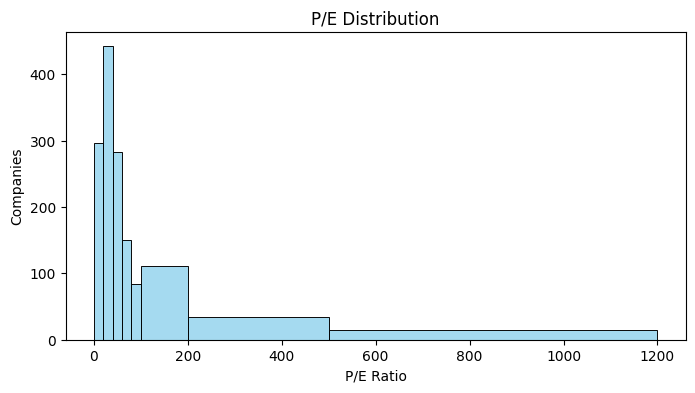

In [197]:
# fewer bins = cleaner picture
bins = [0, 20, 40, 60, 80, 100, 200, 500, 1200]   # only 8 edges
PE_counts = pd.cut(df['PE'], bins=bins).value_counts().sort_index()    # cut picks every PE value and drops it in the corresponding bins

print(PE_counts)

plt.figure(figsize=(8,4))
sns.histplot(data=df, x='PE', bins=bins, color='skyblue', edgecolor='black')             
plt.title('P/E Distribution')
plt.xlabel('P/E Ratio')
plt.ylabel('Companies')
plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
✅ <b>Insight</b><br><br>
• Nearly half (442 out of 1 425, 31%) of Indian stocks sit in the tight 20–40 P/E band, while only 3% trade above 200—confirming that extreme valuations are rare and the market’s “normal zone” is well below 60.<br>
• <b>Investment Opportunity:</b> The 20–40 P/E bucket (31% of stocks) offers the largest set of fairly-valued companies. Combine this with high ROCE and low debt to shortlist strong “growth-at-reasonable-price” candidates.<br>
• <b>Risk Assessment:</b> Only 3% of firms show P/E > 200; treat such cases as red-flags. Verify whether sales and profit growth genuinely justify the high valuation—otherwise, walk away.
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
2. Problem – Univariate Analysis of ROCE
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
<b>Understanding the Efficiency of Indian Companies Through ROCE:</b><br>
This analysis examines how effectively Indian companies generate profits from their capital. It 
focuses on identifying the typical ROCE range, spotting exceptionally high-efficiency outliers, 
and determining the minimum ROCE level that most investors consider financially healthy or ‘good’.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [198]:

# 1. Missing ROCE values
df['ROCE'].isna().sum()


np.int64(0)

In [199]:
df['ROCE'].describe()

count    1425.000000
mean       19.053495
std        14.284563
min        -0.340000
25%        10.340000
50%        16.150000
75%        23.990000
max       199.440000
Name: ROCE, dtype: float64

In [200]:

# Top 5 companies with highest ROCE
df.nlargest(5, 'ROCE')[['Company', 'ROCE']]


,Company,ROCE
1277,Ksolves India,199.44
38,Nestle India,169.08
170,P & G Hygiene,111.80
510,Tips Music,103.80
380,Waaree Renewab.,103.29


In [201]:

# Bottom 5 companies with lowest ROCE
df.nsmallest(5, 'ROCE')[['Company', 'ROCE']]


,Company,ROCE
2642,Nahar Poly,-0.34
2526,Sunshine Capital,0.25
1261,Oswal Green Tech,0.45
1193,Texmaco Infrast.,0.46
2541,Oswal Agro Mills,0.48


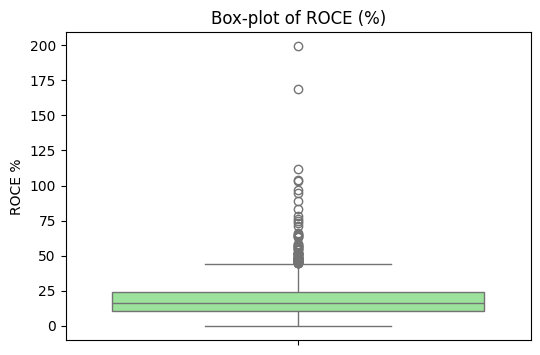

In [202]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['ROCE'], color='lightgreen')
plt.title('Box-plot of ROCE (%)')
plt.ylabel('ROCE %')
plt.show()

In [203]:

# Calculate the median ROCE
df['ROCE'].median()


np.float64(16.15)

In [204]:
# Calculating the first quartile (25th percentile)
Q1 = df['ROCE'].quantile(0.25)
print("First quartile :", Q1)

# Calculate the third quartile (75th percentile)
Q3 = df['ROCE'].quantile(0.75)
print("Third quartile :",  Q3)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
print("IQR :", IQR)

First quartile : 10.34
Third quartile : 23.99
IQR : 13.649999999999999


<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Typical Range:</b> Most companies (middle 50%) have ROCE values between 10.34% and 23.99%, indicating the normal efficiency range.</li>
    <li><b>Outliers:</b> ROCE values significantly above 23.99% or below 10.34% signal outliers—either highly efficient performers or underperforming companies.</li>
    <li><b>Investment Opportunities:</b> Firms near the upper end of this range may be attractive to investors seeking strong capital efficiency.</li>
    <li><b>Risk Assessment:</b> Companies near the lower end may pose higher risk due to weaker return generation on their capital.</li>
  </ul>
</div>


<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
3. Problem – Univariate Analysis of Dividend Payout
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
<b>Understanding Dividend Payout Behavior Among Indian Companies:</b><br>
This analysis determines what percentage of Indian companies distribute cash dividends to their 
shareholders. It helps income-focused investors gauge how many viable dividend-paying 
opportunities exist in the market and assess the overall reliability of dividend-based investing.
</p>


<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [205]:

# Missing values in DividendYield
df['DividendYield'].isna().sum()


np.int64(0)

In [206]:

# Min dividend payout
df['DividendYield'].min()


np.float64(0.0)

In [207]:

# Biggest dividend Payout
df['DividendYield'].max()


np.float64(29.17)

In [208]:

# Companies that gives no dividend
(df['DividendYield'] == 0).sum()


np.int64(397)

In [209]:

# Companies that pay dividends
(df['DividendYield'] > 0).sum()


np.int64(1028)

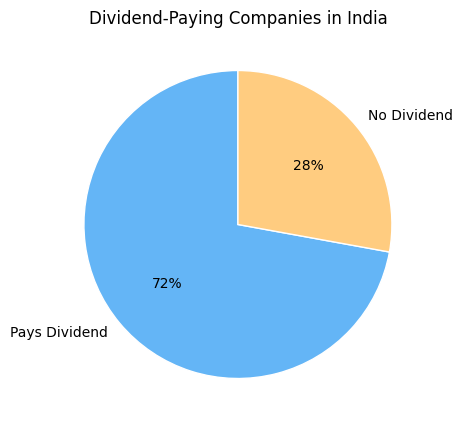

In [210]:
plt.figure(figsize=(5,5))

df['pays_div'] = (df['DividendYield'] > 0).astype(int)
pie_data = df['pays_div'].value_counts()
colors = ['#64b5f6', '#ffcc80']

plt.pie(
    pie_data, 
    labels=['Pays Dividend', 'No Dividend'], 
    autopct='%1.0f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title('Dividend-Paying Companies in India')
plt.show()


<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Dividend Prevalence:</b> A strong majority of companies (72%) pay dividends, indicating that dividend distribution is a common and mature practice in the Indian equity market.</li>
    <li><b>Growth vs. Income Split:</b> The remaining 28% of non-dividend-paying companies are typically growth-oriented or early-stage businesses that prefer to reinvest profits for expansion rather than distribute them as cash.</li>
    <li><b>Investment Opportunities:</b> The high proportion of dividend-paying firms provides a broad investment universe for income-focused investors seeking steady cash flows.</li>
    <li><b>Risk Assessment:</b> Non-dividend-paying companies often carry higher earnings uncertainty, making them more suitable for growth investors with a higher risk appetite.</li>
  </ul>
</div>


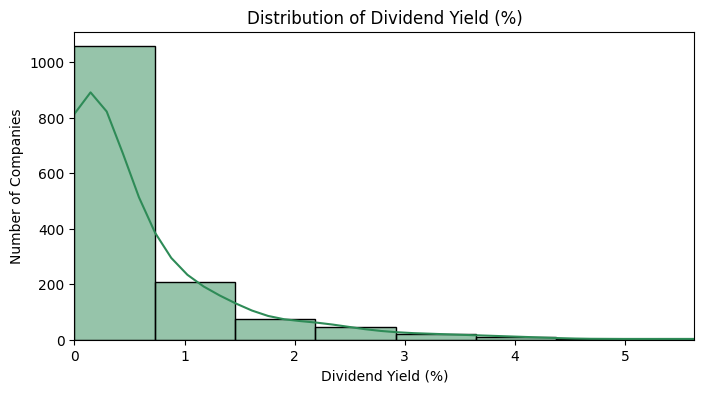

In [211]:
plt.figure(figsize=(8, 4))

sns.histplot(
    df['DividendYield'],
    bins=40,
    kde=True,
    color='seagreen'
)

# Trimming the graph to remove insane outliers
plt.xlim(0, df['DividendYield'].quantile(0.995))

plt.title('Distribution of Dividend Yield (%)')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('Number of Companies')

plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Right-Skewed Pattern:</b> The distribution shows a sharp concentration of companies offering very low dividend yields, with the density curve dropping steadily as yields increase. This indicates that high-yield stocks are comparatively rare.</li>
        <li><b>Typical Yield Range:</b> Most companies cluster near the bottom end of the scale (often between 0% and 1–2%), suggesting that modest dividend payouts are the norm in the Indian equity market.</li>   
    <li><b>High-Yield Tail:</b> The long right tail reflects a small number of companies with unusually high dividend yields. These cases should be examined cautiously as they may represent <i>dividend traps</i>—companies with declining stock prices boosting apparent yield.</li> 
    <li><b>Investment Implication:</b> Income-focused investors should focus on companies with moderately high but stable yields, rather than chasing extreme outliers which may signal financial strain rather than sustainable payouts.</li>
  </ul>
</div>

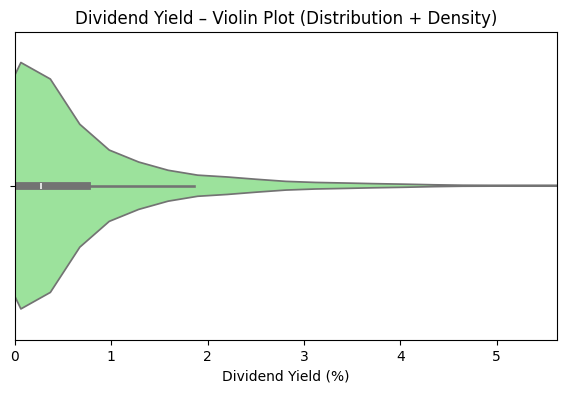

In [212]:
plt.figure(figsize=(7,4))

sns.violinplot(
    x=df['DividendYield'],
    color='lightgreen'
)

plt.xlim(0, df['DividendYield'].quantile(0.995))
plt.title('Dividend Yield – Violin Plot (Distribution + Density)')
plt.xlabel('Dividend Yield (%)')

plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>High Concentration at Low Yields:</b> The violin plot shows a thick bulge near the lower end of the scale, indicating that a large proportion of Indian companies offer very modest dividend yields.</li>  
    <li><b>Right-Skewed Pattern:</b> The distribution tapers sharply as dividend yield increases, reflecting a long right tail. This confirms that high-yield stocks are significantly less common in the market.</li> 
    <li><b>Median Reflects Modest Payouts:</b> The median line lies close to the lower yield region, reinforcing that typical dividend payments in India are relatively conservative.</li>    
    <li><b>Investment Implication:</b> Investors should be cautious with unusually high dividend yields, as their rarity and appearance on the thin right tail often signal potential financial stress or unsustainable payouts.</li>
  </ul>
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#0A3D62; text-align:left;">
🔍 Bivariate Analysis
</h3>

<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
1. Problem – Relationship Between ROCE and Quarterly Profit Variation
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
<b>Understanding the Relationship Between ROCE and Quarterly Profit Stability:</b><br>
This analysis investigates whether companies with higher Return on Capital Employed (ROCE) also 
demonstrate greater consistency in their quarterly profits. It helps answer three key questions:  
(1) whether efficient businesses exhibit more stable earnings,  
(2) whether high profitability is linked to higher or lower volatility, and  
(3) how this relationship can guide investors in identifying high-quality, low-risk companies.  
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [213]:
df[['ROCE', 'QtrProfitVar']].isnull().sum()

ROCE            0
QtrProfitVar    0
dtype: int64

In [214]:
df[['ROCE', 'QtrProfitVar']].describe()

,ROCE,QtrProfitVar
count,1425.000000,1425.000000
mean,19.053495,159.380428
std,14.284563,2150.885795
min,-0.340000,-1300.000000
25%,10.340000,-9.990000
50%,16.150000,13.770000
75%,23.990000,51.800000
max,199.440000,65441.180000


In [215]:
df[['ROCE', 'QtrProfitVar']].corr()

,ROCE,QtrProfitVar
ROCE,1.000000,-0.017862
QtrProfitVar,-0.017862,1.000000


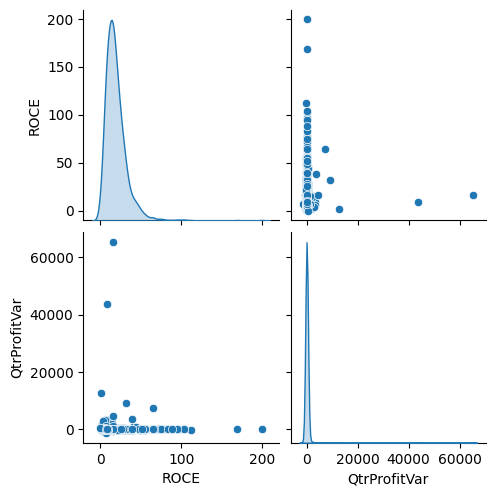

In [216]:
sns.pairplot(df[['ROCE', 'QtrProfitVar']], diag_kind='kde')
plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight – ROCE vs Quarterly Profit Variation</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Most companies are stable:</b> Many firms have moderate ROCE (10–25%) and small changes in quarterly profits, meaning they run their business efficiently and consistently.</li>
    <li><b>No clear trend:</b> ROCE and quarterly profit changes don’t move together – a company being more efficient doesn’t necessarily mean its profits are steadier.</li>
    <li><b>Noticeable outliers:</b> Some companies show very high or very low profit changes – these are unusual and can be risky or special cases.</li>
    <li><b>Easy takeaway:</b> Look for companies that are moderately or highly efficient and have steady profits. Avoid companies with low efficiency and unpredictable profits.


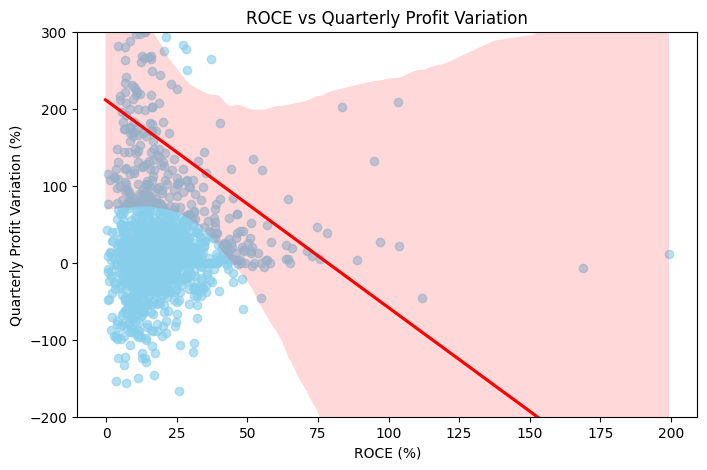

In [217]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x='ROCE',
    y='QtrProfitVar',
    scatter_kws={'alpha':0.6, 'color':'skyblue'},                  # alpha=0.6 → makes overlapping points visible
    line_kws={'color':'red'}                                       # line_kws={'color':'red'} → regression line color
)
plt.title('ROCE vs Quarterly Profit Variation')
plt.xlabel('ROCE (%)')
plt.ylabel('Quarterly Profit Variation (%)')
plt.ylim(-200, 300)  # optional zoom for better readability
plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight – ROCE vs Quarterly Profit Variation</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li>The regression line shows a slight downward slope, but the confidence interval is extremely wide, forming a funnel shape. This indicates high uncertainty in the trend. Although a few extreme outliers pull the line downward, most companies cluster tightly around low quarterly profit variation. As a result, ROCE and profit volatility do not have a reliable or meaningful linear relationship.</li>
    <li>Most companies cluster in a narrow region of moderate ROCE (–200 to +50) and low profit variation (–200 to +150). Outliers pull the regression line, but confidence intervals are extremely wide, indicating the model cannot detect a meaningful trend. ROCE does not predict profit stability in this dataset.</li>
  </ul>
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
2. Problem – Bivariate Analysis of P/E Ratio vs Quarterly Sales Growth (QtrSalesVar)
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
<b> Understanding the Relationship Between P/E Ratio and Quarterly Sales Growth:</b><br>
This analysis explores whether companies with higher sales growth are rewarded with higher valuations (P/E ratio). 
It helps identify three important investment insights:  
(1) whether the market values growth fairly,  
(2) whether any companies are overvalued for their growth levels, and  
(3) whether some high-growth companies may still be undervalued.  
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [218]:
df[['PE', 'QtrSalesVar']].isna().sum()

PE             0
QtrSalesVar    0
dtype: int64

In [219]:
df[['PE', 'QtrSalesVar']].describe()

,PE,QtrSalesVar
count,1425.000000,1425.000000
mean,81.278063,37.300288
std,380.126573,389.889737
min,1.960000,-100.000000
25%,22.640000,0.000000
50%,38.810000,10.170000
75%,65.190000,23.160000
max,11763.040000,12891.300000


In [220]:
df[['PE', 'QtrSalesVar']].corr()

,PE,QtrSalesVar
PE,1.000000,0.043566
QtrSalesVar,0.043566,1.000000


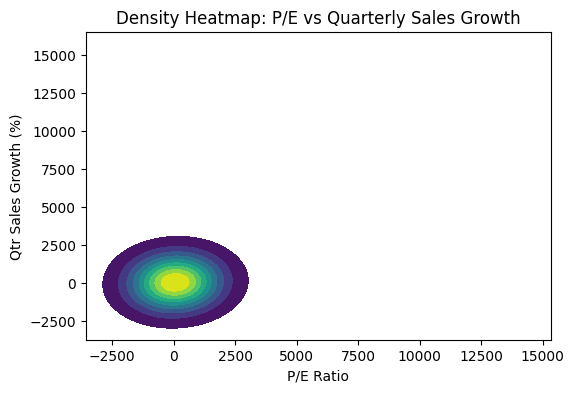

In [221]:
plt.figure(figsize=(6, 4))

sns.kdeplot(
    data=df,
    x='PE',
    y='QtrSalesVar',
    fill=True,
    cmap='viridis',
    bw_adjust=10.5,
    thresh=0.05
)

plt.title('Density Heatmap: P/E vs Quarterly Sales Growth')
plt.xlabel('P/E Ratio')
plt.ylabel('Qtr Sales Growth (%)')
plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>🔍 Insight – P/E vs Quarterly Sales Growth (Density Heatmap)</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Company Clusters:</b> Most companies are concentrated in the low P/E and low quarterly sales growth region, indicating a majority of modestly valued, low-growth stocks.</li>
    <li><b>Outliers:</b> Darker regions outside the central cluster represent rare companies with high P/E or high sales growth — potential high-risk/high-reward cases.</li>
    <li><b>Correlation:</b> The correlation between P/E and quarterly sales growth is very weak (~0.04), showing that valuation is not strongly driven by short-term sales changes.</li>
    <li><b>Investment Opportunities:</b> Outlier companies in high-growth/high-valuation zones may offer growth opportunities, but require careful analysis of profitability and stability before investing.</li>
    <li><b>Risk Assessment:</b> Low-growth, low-valuation clusters are safer but may offer limited upside; weak correlation warns against relying on a single metric like P/E or sales growth.</li>
  </ul>
</div>

In [222]:
df[['PE', 'QtrSalesVar']].quantile([0.05, 0.95])   # Values at the 5th percentile and 95th percentile for these columns.

,PE,QtrSalesVar
0.05,9.502,-21.170
0.95,167.466,80.712


In [223]:
df[['PE', 'QtrSalesVar']].quantile([0.01, 0.99])

,PE,QtrSalesVar
0.01,5.7072,-51.0120
0.99,722.6220,334.2472


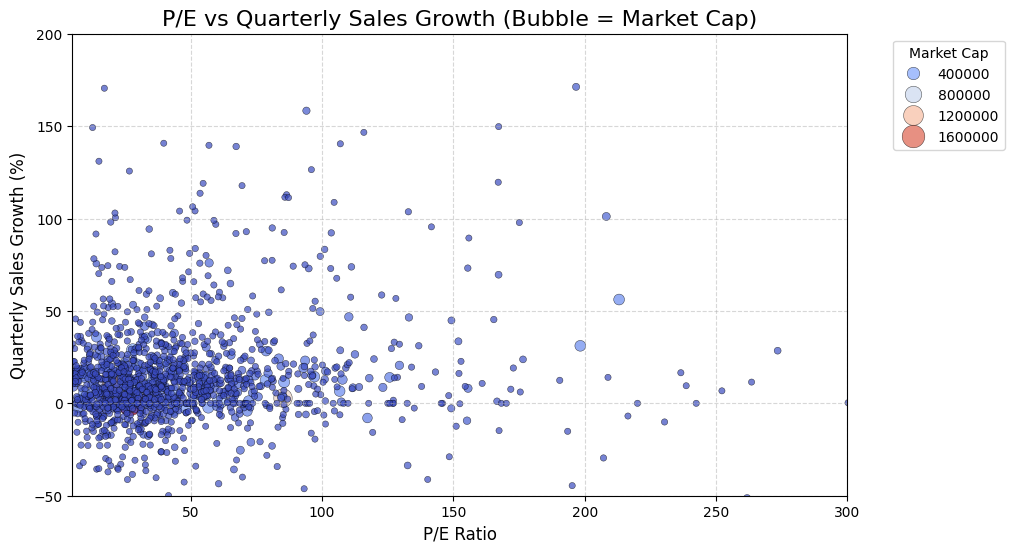

In [224]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='PE',
    y='QtrSalesVar',
    size='MarketCap',       # Bubble size proportional to Market Cap
    sizes=(20, 300),        # Min and max bubble size
    hue='MarketCap',        # Color gradient by Market Cap
    palette='coolwarm',     # Blue → Red gradient
    alpha=0.7,              # Slight transparency for overlapping bubbles
    edgecolor='black'       # Bubble outlines
)

plt.xlim(5, 300)
plt.ylim(-50, 200)

plt.title('P/E vs Quarterly Sales Growth (Bubble = Market Cap)', fontsize=16)
plt.xlabel('P/E Ratio', fontsize=12)
plt.ylabel('Quarterly Sales Growth (%)', fontsize=12)
plt.legend(title='Market Cap', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()   

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">

  <b style="font-size:18px;">✅ Insight </b><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Strong Central Cluster:</b> Most Indian companies fall within the moderate range of P/E and quarterly sales variation, showing that the market largely consists of reasonably valued and stable businesses.</li>
    <li><b>Market-Cap Stability Pattern:</b> Large-cap firms remain tightly packed near the center of the plot, indicating higher predictability and lower volatility in both valuation and sales performance.</li>    
    <li><b>Small-Cap Outliers:</b> Only a small number of small-cap companies extend outward with higher P/E or higher sales variation, suggesting limited high-growth, high-risk opportunities.</li>    
    <li><b>Investment & Risk Insight:</b> The market demonstrates a predominantly stable risk profile, with a very small fringe of aggressive companies. Conservative investors may prefer the dense central cluster, while growth-seekers may explore the few small-cap outliers.</li>
  </ul>

</div>


<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
3. Problem – Bivariate Analysis of Market Cap vs Dividend Yield
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
This analysis explores whether larger companies tend to pay consistent dividends, helping investors identify stable, high-quality stocks. 
Large-cap firms generally offer steady payouts, while smaller companies may have irregular dividends, highlighting potential risk. 
Combining market cap and dividend yield helps screen reliable dividend-paying opportunities.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [225]:
bins = [0, 500, 5000, float('inf')]
labels = ['Small Cap', 'Mid Cap', 'Large Cap']
df['MarCapCategory'] = pd.cut(df['MarketCap'], bins=bins, labels=labels)

In [226]:
df.groupby('MarCapCategory', observed=False)['DividendYield'].agg(['count', 'mean', 'median','std', 'min', 'max'])

,count,mean,median,std,min,max
MarCapCategory,,,,,,
Small Cap,0,NaN,NaN,NaN,NaN,NaN
Mid Cap,719,0.514409,0.180,1.328604,0.0,29.17
Large Cap,706,0.706076,0.375,0.981203,0.0,7.60


<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight – Market Cap vs Dividend Yield</b><br><br>

  Mid-cap companies have an average dividend yield of ~0.51%, but the median is just 0.18%, showing that most mid-caps pay very low dividends while a few offer unusually high payouts (up to 29%).<br>
  Large-cap companies have slightly higher and more consistent yields, with an average of ~0.71%, median 0.375%, and a maximum of 7.6%.<br>
  This suggests that investors seeking **stable income** should focus on large-caps, while mid-caps may offer **occasional high payouts** but with higher risk.
</div>

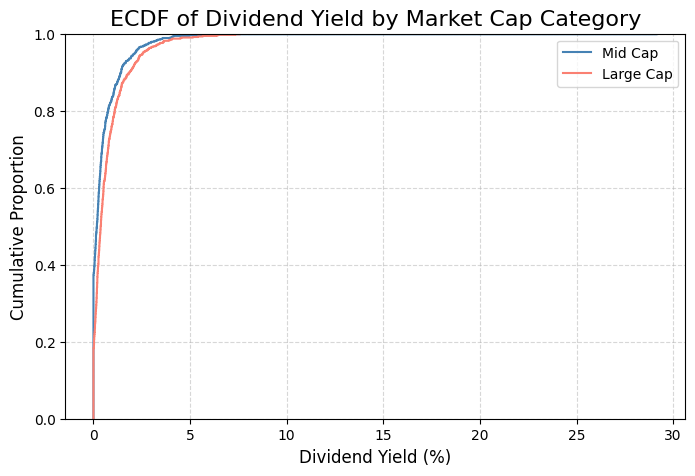

In [227]:
plt.figure(figsize=(8,5))

# ECDF for Mid Cap                                                      # -----------------------------------------------------
sns.ecdfplot(                                                            # ECDF = Empirical Cumulative Distribution Function
    data = df[df['MarCapCategory'] == 'Mid Cap'],                       # -----------------------------------------------------
    x = 'DividendYield',
    label = 'Mid Cap',
    color = 'steelblue'
)

# ECDF for Large Cap 
sns.ecdfplot(
    data = df[df['MarCapCategory'] == 'Large Cap'],
    x = 'DividendYield',
    label = 'Large Cap',
    color = 'salmon'
)

plt.title('ECDF of Dividend Yield by Market Cap Category', fontsize=16)
plt.xlabel('Dividend Yield (%)', fontsize=12)
plt.ylabel('Cumulative Proportion', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li>Across the entire dividend-yield distribution, <b>Large-Cap companies consistently stay above Mid-Caps</b>, meaning large companies tend to offer higher payouts.</li>    
    <li>The <b>median Dividend Yield</b> of Large Caps (0.375%) is more than double that of Mid Caps (0.18%).  
    This means 50% of large companies pay dividends ≤ 0.375%, while 50% of mid-caps pay ≤ only 0.18%.</li>
    <li>The gap between the blue (Mid Cap) and red (Large Cap) ECDF curves shows that <b>a larger proportion of mid-cap firms cluster near very low or zero dividend yields</b>.</li>
    <li>For investors, ECDF highlights that <b>large caps are more reliable income providers</b>, while mid-caps offer fewer but potentially higher-yield outliers.</li>
  </ul>
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#E74C3C; text-align:center; font-size:22px;">
Feature Engineering
</h3>

<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 1: Quality at Reasonable Price (QARP)
</h4>

<p style="font-family:Georgia; font-size:15px; color:#0A3D62; text-align:left; font-size:16px;">
Goal: Identify companies that generate high returns on capital (ROCE) but aren’t overly expensive (low P/E).
</p>

In [228]:
df['PE'] = df['PE'].replace(0, np.nan)                     # This ensures that any P/E value that is 0 becomes NaN.
                                                           # Division by NaN will also give NaN, which is safe.

In [229]:
df['PE'].isna().sum()

np.int64(0)

In [230]:
df['QARP'] = df['ROCE'] / df['PE']

In [231]:
df.head(2)

,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn,pays_div,MarCapCategory,QARP
0,Reliance Industr,2703.0,26.93,1828876.34,0.18,19323.0,-4.78,231535.0,-0.15,9.61,69797.17,1,Large Cap,0.356851
1,TCS,4067.4,30.52,1471620.94,1.36,11955.0,5.00,64259.0,7.65,64.28,46598.19,1,Large Cap,2.106160


<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 2: Profit Stability
</h4>

<p style="font-family:Georgia; font-size:15px; color:#0A3D62; text-align:left; font-size:16px;">
Goal: Measure how stable quarterly profits are.<br>
Smaller fluctuations → more stable → lower risk.
</p>

In [232]:
df['ProfitStability'] = -df['QtrProfitVar'].abs()

<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 3: Sales Stability
</h4>

<p style="font-family:Georgia; font-size:15px; color:#0A3D62; text-align:left; font-size:16px;">
Goal: Same as profit stability, but for quarterly sales variation.
</p>

In [233]:
df['SalesStability'] = -df['QtrSalesVar'].abs()

<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 4: Dividend Category
</h4>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
Goal: Categorize companies based on dividend policy.<br>
• <b>High Dividend</b> → DividendYield &gt; 1.5%<br>
• <b>Moderate Dividend</b> → DividendYield between 0 and 1.5%<br>
• <b>No Dividend</b> → DividendYield = 0
</p>

In [234]:
# lambda syntax = lambda arguments: expression
# cannot use a plain if directly on a pandas Series (df['DividendYield']) because a Series has many values

df['Divcategory'] = df['DividendYield'].apply(
    lambda x: 'High Dividend' if x > 1.5 else 'Moderate Dividend' if x > 0 else 'No Dividend'
)

<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 5: Composite Quality Score
</h4>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
Goal: Combine ROCE and P/E into a single percentile score.<br>
• <b>Rank ROCE</b> → higher ROCE = better<br>
• <b>Rank 1/PE</b> → higher value = better (because lower P/E is more attractive)<br>
• <b>Weighted Sum</b> → 60% ROCE + 40% P/E contribution
</p>

In [235]:
df['QualityScore'] = df['ROCE'].rank(pct=True)*0.6 + (1/df['PE']).rank(pct=True)*0.4

# ✅ This gives a 0–1 scale score; higher means better quality
# ROCE contributes 60% of the final score, PE contributes 40%
# Ranks are converted to a fraction of the total number of items
# Multiplying by a weight (e.g., 0.6) --> gives the weighted contribution to a total score.

<h4 style="font-family:Georgia; font-weight:bold; color:#0A3D62; font-size:18px; text-align:left;">
Step 6: Risk Index
</h4>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
Goal: Combine profit and sales volatility to measure overall risk.<br>
• <b>Rank absolute QtrProfitVar</b><br>
• <b>Rank absolute QtrSalesVar</b><br>
• <b>Weighted Sum</b> → 50% profit volatility + 50% sales volatility</b><br>
• Higher RiskIndex → higher risk (more volatile profits/sales)
</p>

In [236]:
df['RiskIndex'] = df['QtrProfitVar'].abs().rank(pct=True)*0.5 + df['QtrSalesVar'].abs().rank(pct=True)*0.5

In [237]:
df.head(3)

,Company,CMP,PE,MarketCap,DividendYield,NPQtr,QtrProfitVar,SalesQtr,QtrSalesVar,ROCE,PATAnn,pays_div,MarCapCategory,QARP,ProfitStability,SalesStability,Divcategory,QualityScore,RiskIndex
0,Reliance Industr,2703.00,26.93,1828876.34,0.18,19323.00,-4.78,231535.00,-0.15,9.61,69797.17,1,Large Cap,0.356851,-4.78,-0.15,Moderate Dividend,0.401684,0.086667
1,TCS,4067.40,30.52,1471620.94,1.36,11955.00,5.00,64259.00,7.65,64.28,46598.19,1,Large Cap,2.106160,-5.00,-7.65,Moderate Dividend,0.840702,0.224211
2,HDFC Bank,1715.95,18.88,1309403.41,1.13,18627.44,6.03,83001.72,10.61,7.67,63902.06,1,Large Cap,0.406250,-6.03,-10.61,Moderate Dividend,0.416842,0.278246


<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
1.Problem – Identifying High-ROCE, low QtrProfitVar and reasonable DividendYield Companies
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:left;">
This analysis focuses on spotting high-quality, stable, dividend-paying companies. 
It identifies firms with high ROCE, low quarterly profit variation, and reasonable dividend yield, 
providing guidance for investment decisions.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [238]:
# Defining thresholds
high_roce =  30          # ROCE above 30%
low_qtr_profit_var = 10  # QtrProfitVar below 10%
reasonable_div_yield = 2 # DividendYield above 0 but below 2%

# Filtering DataFrame
high_quality_companies = df[
    (df['ROCE'] >= high_roce) &
    (df['QtrProfitVar'].abs() <= low_qtr_profit_var) &
    (df['DividendYield'] > 0) &
    (df['DividendYield'] <= reasonable_div_yield) 
]

# Sorting by QualityScore descending
high_quality_companies = high_quality_companies.sort_values(by='QualityScore', ascending=False)

# Show top 10
high_quality_companies[['Company', 'ROCE', 'QtrProfitVar', 'DividendYield', 'QualityScore']].head(10)

,Company,ROCE,QtrProfitVar,DividendYield,QualityScore
1180,Mishtann Foods,88.74,3.47,0.01,0.995930
9,Life Insurance,72.95,9.27,1.08,0.954386
482,Tanla Platforms,38.28,-8.66,1.45,0.879018
2578,Focus Lighting,39.17,0.44,0.41,0.870035
2645,Kronox Lab,51.53,-3.61,0.30,0.849825
1189,Likhitha Infra.,32.54,7.83,0.41,0.848421
1,TCS,64.28,5.00,1.36,0.840702
2617,Vishnusurya,34.46,0.00,0.36,0.825263
1282,Benares Hotels,40.56,5.26,0.29,0.811789
802,Stylam Industrie,33.70,7.44,0.11,0.804070


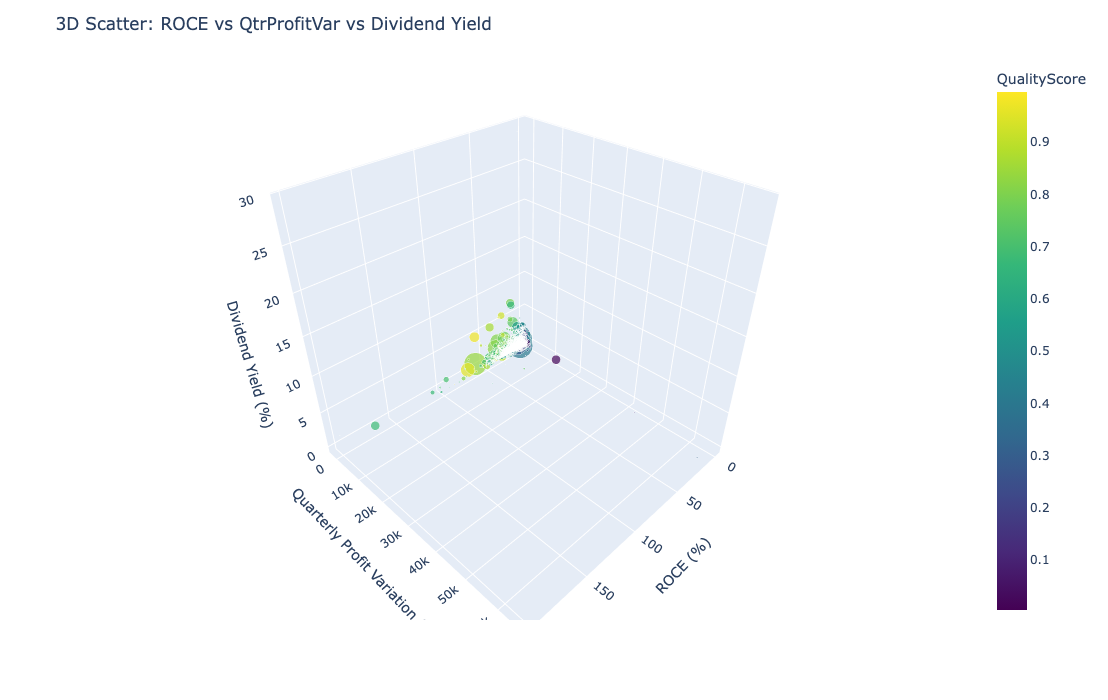

In [251]:
fig = px.scatter_3d(
    df,
    x='ROCE',
    y='QtrProfitVar',
    z='DividendYield',
    size='MarketCap',         # bubble size by Market Cap
    color='QualityScore',     # color by combined score
    hover_name ='Company',    # shows company name when hover
    size_max=40,              # maximum bubble size
    color_continuous_scale ='Viridis'   # nice gradient
)

fig.update_layout(
    title='3D Scatter: ROCE vs QtrProfitVar vs Dividend Yield',
    scene =dict(
        xaxis_title='ROCE (%)',
        yaxis_title='Quarterly Profit Variation (%)',
        zaxis_title='Dividend Yield (%)'
    ),
    autosize=False,
    width=900,
    height=700
)

fig.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li>The majority of companies cluster near the origin (low ROCE, low quarterly profit variation, and low dividend yield), showing that <b>most Indian stocks have modest returns and stable but limited payouts</b>.</li>    
    <li>Several <b>high-quality outliers</b> stand out: for example, Life Insurance (QualityScore 0.954, ROCE 72.95, QtrProfitVar 9.27%, DivYield 1.08%) and Coal India (QualityScore 0.97, ROCE 63.59, QtrProfitVar 4.24%, DivYield 5.41%).  
    These companies combine high efficiency, stable profits, and consistent dividends.</li>
    <li>Conversely, some low-quality outliers like Zomato Ltd (QualityScore 0.014) show <b>high risk due to low efficiency and unstable profits</b>, signaling caution.</li>
    <li>For investors, this 3D visualization emphasizes that <b>focusing on high-quality, clustered outliers can help identify stable, attractive investment opportunities</b>, while ignoring low-quality, risky outliers reduces downside exposure.</li>
  </ul>
</div>

<h3 style="font-family:Georgia; font-weight:bold; color:#C0392B; text-align:left;">
2.Problem – Does Risk Increase When MarketCap Decreases?
</h3>

<p style="font-family:Georgia; font-size:16px; color:#0A3D62; text-align:justify;">
<b>Understanding Whether Smaller Companies Are Actually Riskier:</b><br>
It is widely assumed that small-cap companies show more instability than mid and large caps.  
This multivariate analysis examines how a company’s size (<b>MarketCap</b>) relates to its overall <b>RiskIndex</b>, while also incorporating <b>Quarterly Profit Variation</b> to measure operational volatility.  
The goal is to identify whether risk truly decreases as company size increases, and to find which market-cap segments contain the most stable or most unpredictable businesses.
</p>

<h2 style="font-family:Georgia; font-weight:bold; color:#C39BD3; font-size:16px; text-align:left;">
EDA 
</h2>

In [240]:
df.groupby('MarCapCategory', observed=True)['RiskIndex'].describe()

,count,mean,std,min,25%,50%,75%,max
MarCapCategory,,,,,,,,
Mid Cap,719.0,0.506610,0.265713,0.020526,0.311053,0.507018,0.714912,0.997544
Large Cap,706.0,0.493976,0.218490,0.020526,0.333640,0.486316,0.648026,0.995088


🎯 **Quick Conclusion:**

**There is no big difference in RiskIndex between mid-cap and large-cap companies.
Mid caps are slightly more volatile, but large caps are not dramatically more stable.**

In [254]:
df['AbsQtrProfitVar'] = df['QtrProfitVar'].abs()

df.groupby('MarCapCategory', observed=True)['AbsQtrProfitVar'].describe()

,count,mean,std,min,25%,50%,75%,max
MarCapCategory,,,,,,,,
Mid Cap,719.0,269.302921,2960.153765,0.0,12.3150,33.31,83.115,65441.18
Large Cap,706.0,105.711969,621.763984,0.0,12.8325,28.21,57.370,12550.00


🎯 **Quick Conclusion:**

**At the quarterly profit level, mid caps are significantly more unstable than large caps.
Large caps are not risk-free, but their swings are much more controlled.**

In [242]:
df[['RiskIndex', 'MarketCap']].corr()

,RiskIndex,MarketCap
RiskIndex,1.000000,-0.110684
MarketCap,-0.110684,1.000000


🎯 **Quick Conclusion:**

**There is a very weak negative relationship between MarketCap and RiskIndex (correlation ≈ –0.11).**
**Large companies tend to be slightly more stable, but size does not strongly determine a company’s risk.**

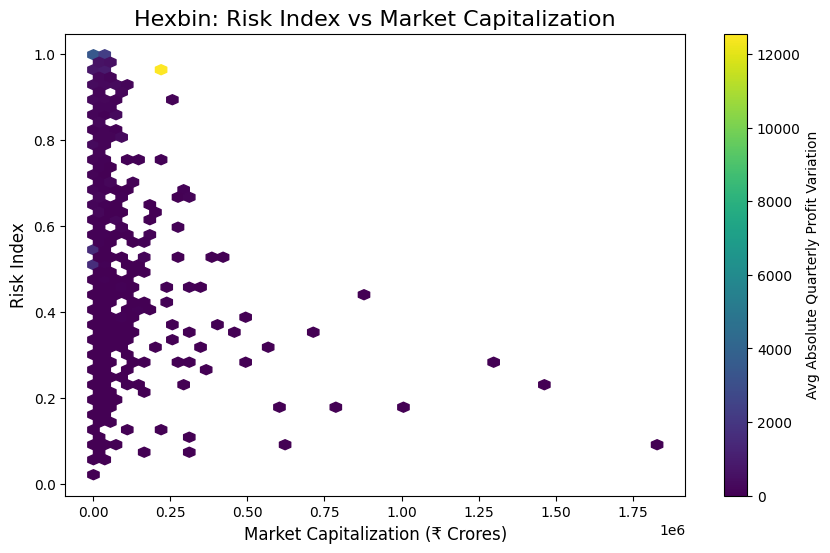

In [255]:
plt.figure(figsize=(10, 6))

hb = plt.hexbin(
    x=df['MarketCap'],                # X-axis: Market Capitalization
    y=df['RiskIndex'],                # Y-axis: Risk Index
    C=df['QtrProfitVar'].abs(),       # Color: average absolute quarterly profit variation
    gridsize=50,                       # Number of hexagons along x-axis
    cmap='viridis',                    # Color map for the hexagons
    reduce_C_function=np.mean,         # Aggregate C values inside each hexagon using mean
    mincnt=1                           # Ignore hexagons with zero points
)

# Colorbar shows the mapping of hex color to average absolute quarterly profit variation
plt.colorbar(hb, label='Avg Absolute Quarterly Profit Variation')

# Titles and axis labels
plt.title('Hexbin: Risk Index vs Market Capitalization', fontsize=16)
plt.xlabel('Market Capitalization (₹ Crores)', fontsize=12)
plt.ylabel('Risk Index', fontsize=12)

plt.show()

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:15px; background-color:#F0F7FF; text-align:justify;">
  <b>✅ Insight – Market Cap vs Risk Index</b><br><br>

  <ul style="padding-left: 20px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>High Risk Among Small-Caps:</b> Most small-cap companies cluster at low market values with wide-ranging RiskIndex, indicating higher potential volatility.</li>    
    <li><b>Stability in Large-Caps:</b> As MarketCap increases, hexagons become sparse and RiskIndex values decrease, showing that large-cap firms are more stable and less risky.</li>    
    <li><b>Volatility Is Rare and Concentrated in Outliers:</b> Hexbin colors show that the vast majority of companies—across all market-cap categories—exhibit <b>low quarterly profit volatility</b>. Only a tiny cluster of extreme outliers shows very high volatility (bright yellow), and these lie at the highest end of the RiskIndex. This confirms that instability is not widespread but concentrated in a small set of firms.</li>   
    <li><b>Profit Instability Appears Only When Risk Is High:</b> A few moderately volatile hexagons appear only in regions of elevated RiskIndex, reinforcing that volatility meaningfully contributes to higher risk but occurs in very limited parts of the market.</li>
    <li><b>Investment Implication:</b> Conservative investors may prefer large-cap stocks for predictable performance, while risk-tolerant investors may explore small-caps for potentially higher returns.</li>
    <li><b>Portfolio Strategy:</b> Combining a few high-risk small-cap picks with stable large-caps can balance growth potential and risk mitigation.</li>
  </ul>
</div>

<h2 style="font-family:Georgia; font-weight:bold; color:#E74C3C; text-align:center; font-size:22px;">
Summary – Key Takeaways
</h2>

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:20px; background-color:#F0F7FF; text-align:justify;">
  <b>📊 Investor-Friendly Summary </b><br><br>

  <ul style="padding-left: 25px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>P/E Ratios:</b> Most Indian stocks trade in the 20–40 P/E range; extremely high valuations (>200 P/E) are rare and warrant caution. Focus on fairly-valued companies with strong ROCE and low debt.</li>
    <li><b>ROCE Distribution:</b> Typical ROCE lies between 10–24%. High-ROCE firms are efficient and attractive, while low-ROCE firms may pose higher risk.</li>
    <li><b>Dividend Payouts:</b> 72% of companies pay dividends, indicating a mature market. Non-dividend payers are often growth-focused and riskier.</li>
    <li><b>Dividend Yield Patterns:</b> Most companies have modest yields (0–2%), with large-caps offering slightly higher and more stable dividends than mid-caps. High-yield outliers should be examined carefully.</li>
    <li><b>ROCE vs Quarterly Profit Variation:</b> High-ROCE, low-variation companies are stable and efficient. Low-ROCE, high-variation companies are riskier and less predictable.</li>
    <li><b>P/E vs Quarterly Sales Growth:</b> Most firms cluster in moderate P/E (5–70) and sales growth (−20% to +40%). High-growth, high-valuation outliers exist but carry higher risk.</li>
    <li><b>Market Cap vs Dividend Yield:</b> Large-caps provide more reliable income; mid-caps may occasionally offer higher payouts but with higher risk. High-quality outliers like Life Insurance and Coal India combine efficiency, stability, and dividends.</li>
    <li><b>Market Cap vs Risk Index:</b> Small-caps are more volatile; large-caps are generally stable. Overall correlation between size and risk is weak, but large companies offer slightly safer bets.</li>
  </ul>

  <br>
  <b>🎯 Quick Conclusion:</b><br>
  Large-caps dominate in stability, mid-caps show higher variability, and focusing on high-quality, efficient companies can reduce downside risk while capturing growth opportunities.
</div>


<h2 style="font-family:Georgia; font-weight:bold; color:#E74C3C; text-align:center; font-size:22px;">
📈 Investor Recommendations Based on the Analysis
</h2>

<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:20px; background-color:#F0F7FF; text-align:justify;">
  <b>📘 Investor Recommendations (Simple & Practical)</b><br><br>

  <ul style="padding-left: 25px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Choose companies that use money wisely:</b> Prefer businesses that make steady profits and don’t waste money. These companies usually grow better and are safer to invest in.</li>
    <li><b>Don’t buy stocks just because they are expensive:</b> Very high-priced stocks often come with higher risk. Look for good companies that are fairly priced instead of following hype.</li>
    <li><b>Prefer companies that pay regular dividends:</b> Dividend-paying companies are usually stable and reliable. If a company never pays dividends, it may be riskier or less predictable.</li>
    <li><b>Pick large companies for safety:</b> Large-caps are generally more stable. Mid-caps can grow faster but need careful selection. Small-caps are the riskiest and should be handled cautiously.</li>
    <li><b>Look for steady growth:</b> Choose companies that grow slowly and consistently instead of those with big ups and downs. Slow and steady performers tend to do better over time.</li>
    <li><b>Watch out for “perfect” companies:</b> A few companies are strong in every way—good profits, fair price, steady dividends. These are great long-term picks worth keeping an eye on.</li>
    <li><b>Use a simple checklist before investing:</b> Make sure the company has stable profits, low debt, fair valuation, regular dividends, and a business model you understand.</li>
  </ul>

  <br>
  <b>🎯 Quick Conclusion:</b><br>
  Choose good, steady, fairly priced companies—especially large ones. Avoid hype, avoid extremely expensive stocks, and stay away from companies with shaky earnings. Invest regularly and think long-term.
</div>


<div style="font-family:Georgia; font-size:16px; color:#0A3D62; border:2px solid #0A3D62; border-radius:8px; padding:20px; background-color:#F0F7FF; text-align:justify;">
  <b>🧭 General Rules for All Investors </b><br><br>

  <ul style="padding-left: 25px; list-style-position: outside; margin: 0; text-align: left;">
    <li><b>Diversify your investments:</b> Don’t put all your money into one stock or one sector. Spreading your investments reduces risk.</li>
    <li><b>Invest regularly, not randomly:</b> Investing a little every month (like an SIP) protects you from market ups and downs.</li>
    <li><b>Avoid chasing quick profits:</b> Fast returns often come with high risk. Slow and steady investing works better over the long term.</li>
    <li><b>Be careful with companies that have high debt:</b> Too much debt makes a company risky, especially during tough economic times.</li>
    <li><b>Only invest in businesses you understand:</b> If you don't understand how a company earns money, it's better to skip it.</li>
    <li><b>Review your portfolio at least once a year:</b> Make small adjustments—reduce overgrown positions and add to strong long-term companies.</li>
    <li><b>Don’t let emotions control investment decisions:</b> Avoid panic selling when prices fall or overbuying when prices rise. Stay focused on long-term goals.</li>
  </ul>

  <br>
  <b>🎯 Quick Tip:</b><br>
  Keep your investing simple: buy good companies, stay diversified, invest regularly, avoid emotional decisions, and give your money time to grow.
</div>